In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline

# Lets import our package 

In [23]:
import rmfit

In [24]:
df = pd.read_csv('../data/example/01_hatp2/albrecht2012.csv',comment='#',sep=';')
df.name.unique()
df = df[df.name=='HAT-P-2'].reset_index(drop=True)
df

,name,bjd,rv,f_RVel,e_rv,inst
0,HAT-P-2,2.454258e+06,107.29,NaN,11.47,HIRES
1,HAT-P-2,2.454258e+06,113.38,NaN,11.27,HIRES
2,HAT-P-2,2.454258e+06,102.73,NaN,11.29,HIRES
3,HAT-P-2,2.454258e+06,73.36,NaN,11.12,HIRES
4,HAT-P-2,2.454258e+06,72.43,NaN,10.98,HIRES
...,...,...,...,...,...,...
92,HAT-P-2,2.454258e+06,-278.41,NaN,10.80,HIRES
93,HAT-P-2,2.454258e+06,-297.41,NaN,10.85,HIRES
94,HAT-P-2,2.454258e+06,-350.56,NaN,11.02,HIRES
95,HAT-P-2,2.454258e+06,-352.35,NaN,11.08,HIRES


<ErrorbarContainer object of 3 artists>

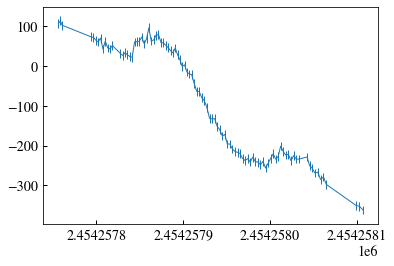

In [25]:
fig, ax = plt.subplots()
ax.errorbar(df.bjd,df.rv,df.e_rv)

In [29]:
f = '../data/example/01_hatp2/hatp2_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)

   prior          arg1       arg2     label description priortype  fixed
0     NP  2.454213e+06    0.00060     t0_p1       t0_p1     model  False
1     NP  5.633410e+00    0.00013      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.00000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.00000     vsini       vsini     model  False
4     UP  8.500000e+01   90.00000    inc_p1      inc_p1     model  False
5     NP  7.227000e-02    0.00070      p_p1        p_p1     model  False
6     NP  9.000000e+00    3.00000      a_p1        a_p1     model  False
7     NP  1.480000e+00    0.05000     rstar       rstar     model  False
8     NP  5.000000e-01    0.05000        u1          u1     model  False
9     UP -4.000000e+02  400.00000     gamma       gamma     model  False
10    NP  5.010000e-01    0.00700    ecc_p1      ecc_p1     model  False
11    NP -1.726000e+02    1.60000  omega_p1    omega_p1     model  False
12    NP  5.200000e+00    0.50000     vbeta       v

In [30]:
TF.minimize_PyDE(mcmc=False)

Running PyDE Optimizer
Optimized using PyDE
Final parameters:
      labels       centers         lower         upper            pv  center_dist
0      t0_p1  2.454213e+06  2.454213e+06  2.454213e+06  2.454213e+06    -0.000016
1       P_p1  5.633410e+00  5.632760e+00  5.634060e+00  5.633561e+00    -0.000151
2     lam_p1  0.000000e+00 -1.800000e+02  1.800000e+02  9.647189e+00    -9.647189
3      vsini  1.500000e+01  0.000000e+00  3.000000e+01  1.691831e+01    -1.918312
4     inc_p1  8.750000e+01  8.500000e+01  9.000000e+01  8.883411e+01    -1.334110
5       p_p1  7.227000e-02  6.877000e-02  7.577000e-02  7.291844e-02    -0.000648
6       a_p1  9.000000e+00 -6.000000e+00  2.400000e+01  1.046227e+01    -1.462275
7      rstar  1.480000e+00  1.230000e+00  1.730000e+00  1.520853e+00    -0.040853
8         u1  5.000000e-01  2.500000e-01  7.500000e-01  5.509742e-01    -0.050974
9      gamma  0.000000e+00 -4.000000e+02  4.000000e+02  3.609787e+02  -360.978690
10    ecc_p1  5.010000e-01  4.660000

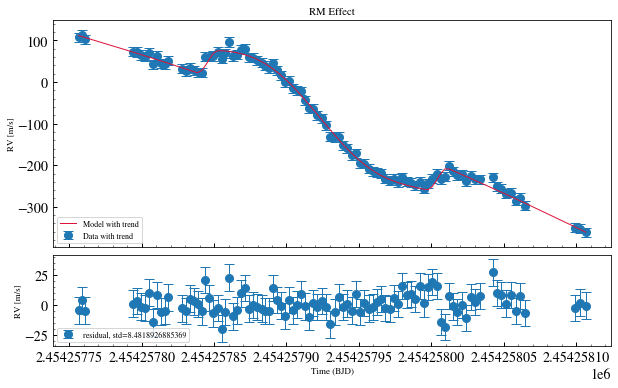

In [31]:
TF.plot_lc(TF.min_pv)

In [32]:
f = '../data/example/01_hatp2/hatp2_priors.dat'
L = rmfit.rmfit.LPFunction(df.bjd.values,df.rv.values,df.e_rv.values,f)
TF = rmfit.rmfit.RMFit(L)
TF.minimize_PyDE(mcmc=True,mc_iter=500)

   prior          arg1       arg2     label description priortype  fixed
0     NP  2.454213e+06    0.00060     t0_p1       t0_p1     model  False
1     NP  5.633410e+00    0.00013      P_p1        P_p1     model  False
2     UP -1.800000e+02  180.00000    lam_p1      lam_p1     model  False
3     UP  0.000000e+00   30.00000     vsini       vsini     model  False
4     UP  8.500000e+01   90.00000    inc_p1      inc_p1     model  False
5     NP  7.227000e-02    0.00070      p_p1        p_p1     model  False
6     NP  9.000000e+00    3.00000      a_p1        a_p1     model  False
7     NP  1.480000e+00    0.05000     rstar       rstar     model  False
8     NP  5.000000e-01    0.05000        u1          u1     model  False
9     UP -4.000000e+02  400.00000     gamma       gamma     model  False
10    NP  5.010000e-01    0.00700    ecc_p1      ecc_p1     model  False
11    NP -1.726000e+02    1.60000  omega_p1    omega_p1     model  False
12    NP  5.200000e+00    0.50000     vbeta       v

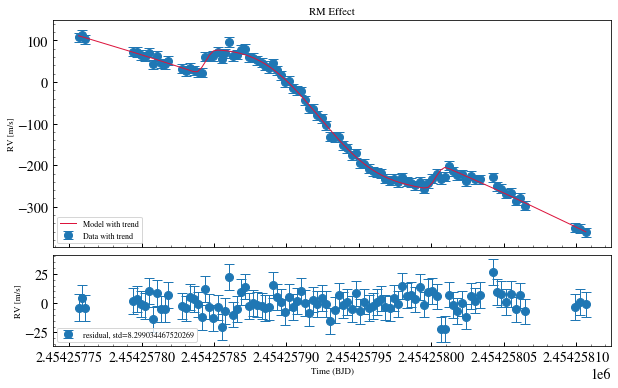

In [33]:
TF.plot_lc_mcmc_fit()

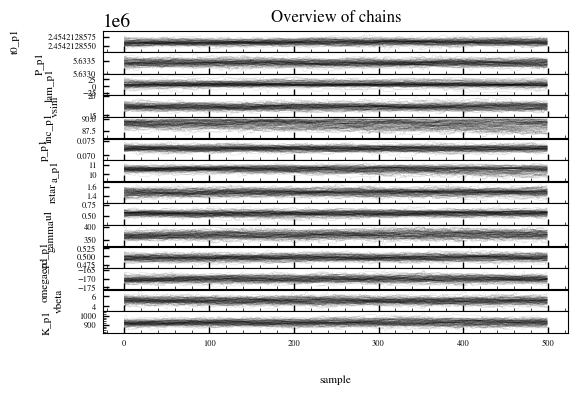

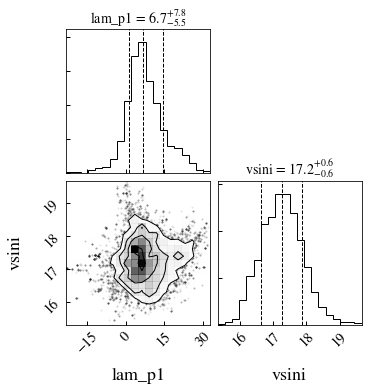

In [34]:
from astropylib import mcFunc
mcFunc.plot_chains(TF.sampler.chain,labels=TF.lpf.ps_vary.labels)
fig = mcFunc.plot_corner(TF.sampler.chain[:,300:,[2,3]],
       show_titles=True,labels=np.array(TF.lpf.ps_vary.descriptions)[[2,3]],title_fmt='.1f',xlabcord=(0.5, -0.2))

In [38]:
pv_50[0]

2454212.8561170204

Sampling, i= 0
Sampling, i= 100
Sampling, i= 200
Sampling, i= 300


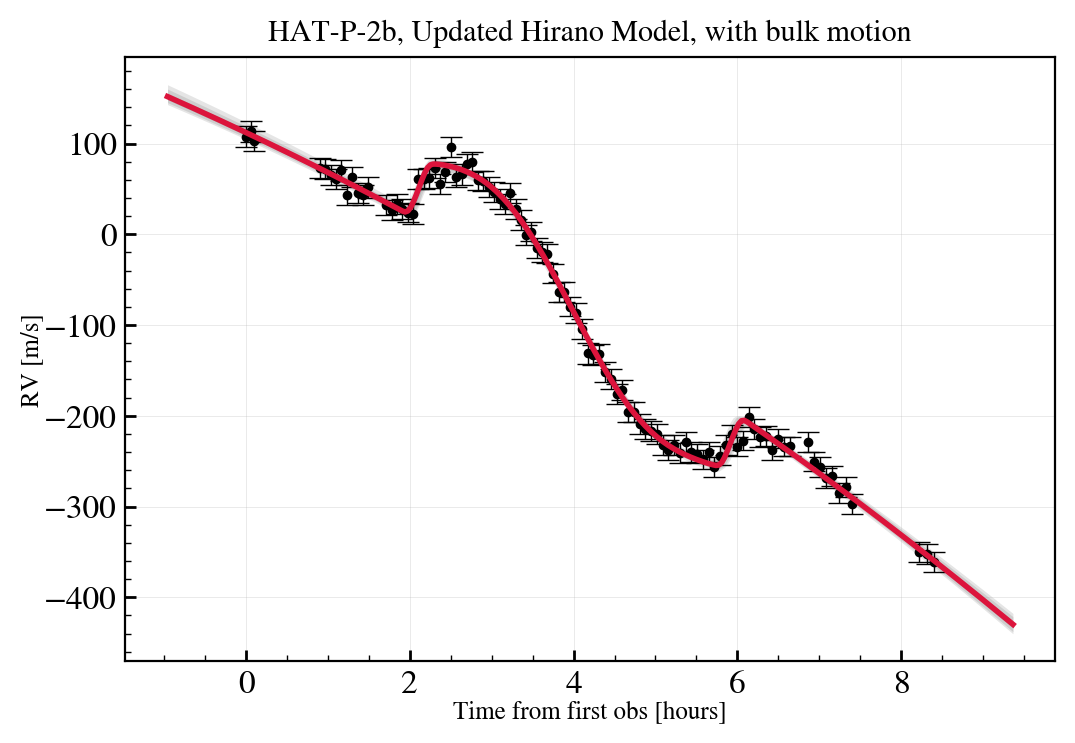

In [44]:
import astropylib.spec_help
flatchain = TF.sampler.chain[:,200:,:].reshape((-1,len(TF.lpf.ps_vary.priors)))

times1 = np.linspace(TF.lpf.data['time'][0]-0.02,TF.lpf.data['time'][-1]+0.02,500)


pv_50 = np.percentile(flatchain,[50],axis=0)[0]
s1 = 0.#pv_50[12]
t1_mod = np.linspace(times1.min()-0.02,times1.max()+0.02,300)
rv_50_1 = TF.lpf.compute_transit(pv_50,t1_mod)
#t01 = np.round((pv_50[0]-TF.lpf.data['time'][0])/pv_50[1])*pv_50[1] + pv_50[0]
t01 = TF.lpf.data['time'][0]#pv_50[1]

# Plot random samples
fig, ax = plt.subplots(dpi=200)

#################
# Transit 1
#################
markercolor="black"
ax.errorbar((TF.lpf.data['time']-t01)*24,TF.lpf.data['flux'],np.sqrt(TF.lpf.data['error']**2.+s1**2.),
            marker='o',elinewidth=0.5,capsize=4,lw=0,mew=0.5,color=markercolor,markersize=3)
ax.plot((t1_mod-t01)*24.,rv_50_1,color="crimson",
        label=r'HPF RVs: Best-fit model: $\lambda=${:0.0f}'.format(pv_50[2])+'$^{\circ}$',lw=2.,zorder=10)

#################
# Sample models
#################
mmodel1 = []
for i in range(400):
    if i%100 == 0: print("Sampling, i=",i)
    idx = np.random.randint(0, flatchain.shape[0])
    m1 = TF.lpf.compute_transit(flatchain[idx],times=t1_mod)
    mmodel1.append(m1)
mmodel1 = np.array(mmodel1)

shadecolor="black"
ax.fill_between((t1_mod-t01)*24.,np.quantile(mmodel1,0.16,axis=0),np.quantile(mmodel1,0.84,axis=0),alpha=0.1,color=shadecolor,lw=0,label='1$\sigma$',zorder=-1)
ax.fill_between((t1_mod-t01)*24.,np.quantile(mmodel1,0.02,axis=0),np.quantile(mmodel1,0.98,axis=0),alpha=0.1,color=shadecolor,lw=0,label='2$\sigma$',zorder=-1)
ax.fill_between((t1_mod-t01)*24.,np.quantile(mmodel1,0.0015,axis=0),np.quantile(mmodel1,0.9985,axis=0),alpha=0.1,color=shadecolor,lw=0,label='3$\sigma$',zorder=-1)

ax.set_xlabel('Time from first obs [hours]',labelpad=0)
ax.set_ylabel('RV [m/s]',labelpad=0)
ax.set_title('HAT-P-2b, Updated Hirano Model, with bulk motion')
astropylib.gkastro.ax_apply_settings(ax)
#ax.set_xlim(-2,6)